FEUILLE DE TP 9

---
# Intégration numérique (Partie 3)
---

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

Dans ce TP, nous allons programmer les formules d'intégration de Gauss pour calculer
\begin{equation*}
I = \int\limits_{ -1 }^{ 1 } f( x ) dx.
\tag{1}\label{1}
\end{equation*}
Nous les testerons sur la fonction suivante :
\begin{equation*}
f_0( x ) = \exp( -x ), \quad f_1(x) = \exp( -x^2 / 2 )%\sqrt{\cos ( \pi x / 2) }.
\end{equation*}

**Question 1.**

> Définissez ces fonctions et tracez les sur l'intervalle $[-1, 1]$.

Text(0, 0.5, '$f(x)$')

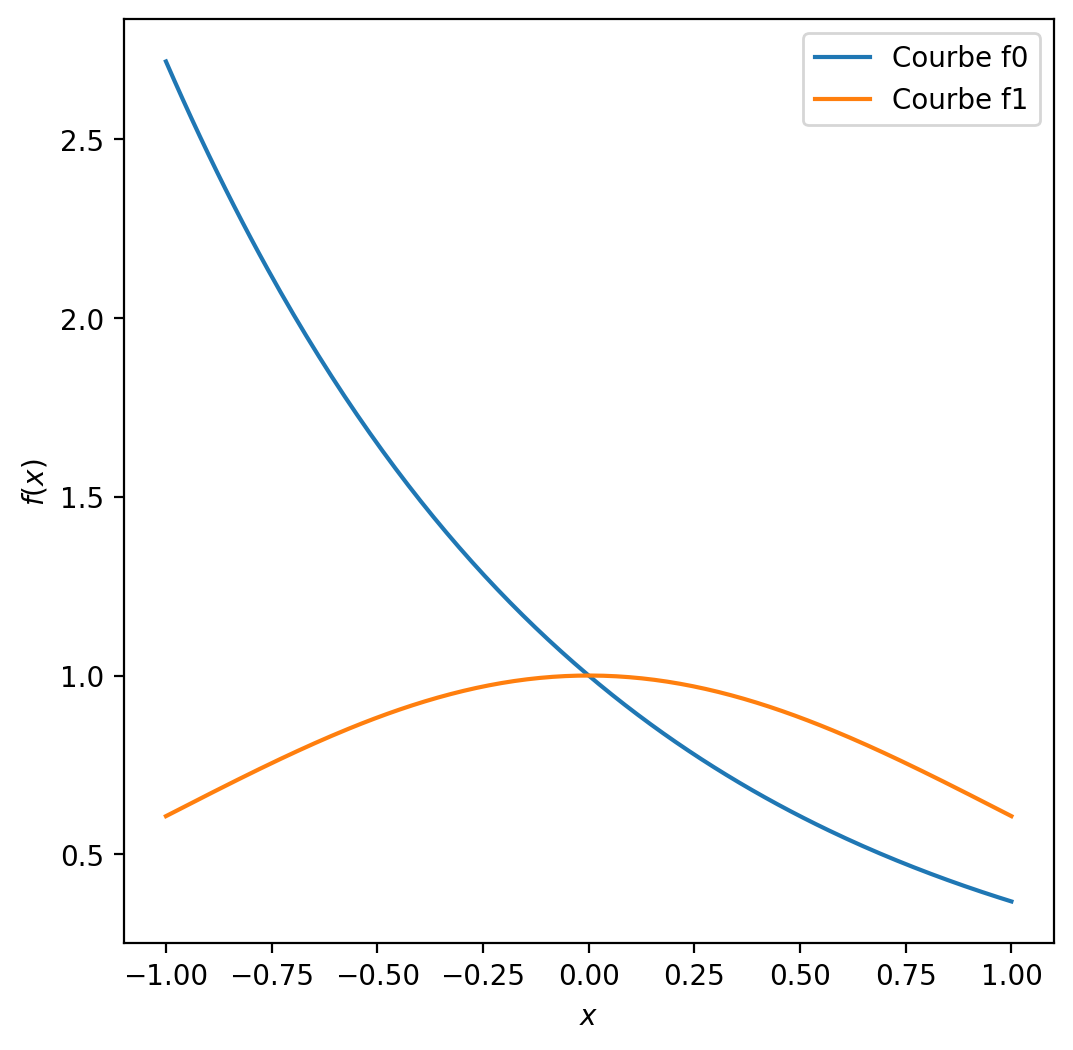

In [8]:
def f0(x):
    return np.exp(-x)

def f1(x):
    return np.exp(-np.power(x, 2)/2)

x = np.linspace(-1, 1, 200)
fig, ax = plt.subplots(figsize=(6,6))

for f in [f0, f1]:
    ax.plot(x, f(x), label=f'Courbe {f.__name__}')

ax.legend()
ax.set_xlabel(f'$x$')
ax.set_ylabel(f'$f(x)$')

On rappelle que l’idée de la quadrature de Gauss est d'approcher la fonction $ f $ sous le signe de l'intégrale (1) par son polynome interpolateur aux points $ x_1, x_2, \ldots, x_N $ espacés de manière non-régulière, en cherchant un ``bon choix'' des $ x_k $ qui, pour $ N > 0 $ fixé,
rendrait la formule de quadrature précise de degré le plus grand possible.

Soit $ J( f ) = \sum_{ i = 1 }^N \lambda_k f( x_k ) $ la formule de quadrature de Gauss \`a $ N $ points.  On peut montrer que
- les positions $ x_k $ des points de quadrature sont les racines du polynome de Legendre $ P_N $ de degré $ N $.
Les polynomes de Legendre peuvent se calculer par récurrence avec la relation
\begin{align*}
& P_0 = 1, \\
& P_1 = x, \\
& P_{ N } = \frac{ ( 2N -1 ) x P_{ N - 1 }( x ) - ( N - 1 ) P_{ N - 2 }( x ) }{ N }.
\end{align*}
Leurs racines n’ont pas toujours d’expression analytique, et le plus souvent, elles doivent etre calculées
numériquement.
- les $ N $ coefficients associés aux points de quadrature sont $ \lambda_k = 2 w_k $ avec:
$$
w_k = \frac{ 1 }{ ( 1 - x_k^2 ) P'_{N}( x_k )^2 } = \frac{ ( 1 - x_k^2 ) }{ N^2 P_{N-1}^2( x_k ) }.
$$
On peut montrer que $ \forall N > 0 $ $ \sum\limits_{k=1}^{N} w_k = 1 $.

**Question 2.**
> 1. Ecrire une fonction recursive `poly_legendre( x, n )` qui prend en argument un `ndarray` `x` et un entier `n` et qui retourne une évaluation de $n$-ième polynome de Legendre $ P_n $ aux points `x`.
> 2. Tracer les polynomes $ P_n $, $ n = 1, 2, \ldots, 6 $ sur $  [ -1, 1 ]$.
> 3. En se servant du graphique donner des valeurs approchées de points de quadrature $ x_k $, $ k = 0, \ldots, n $ pour $ n = 1, 2, 3 $. Les résultats que vous obtenez pour $ n = 1, 2 $ sont-ils conformes aux résultats vus en cours? 

In [42]:
def poly_legendre(x, n):
    if n == 0:
        return np.ones_like(x)
    if n == 1:
        return x
    else:
        return ((2*n-1) * x * poly_legendre(x, n-1) - (n - 1) * poly_legendre(x, n-2)) / n

Text(0, 0.5, '$f(x)$')

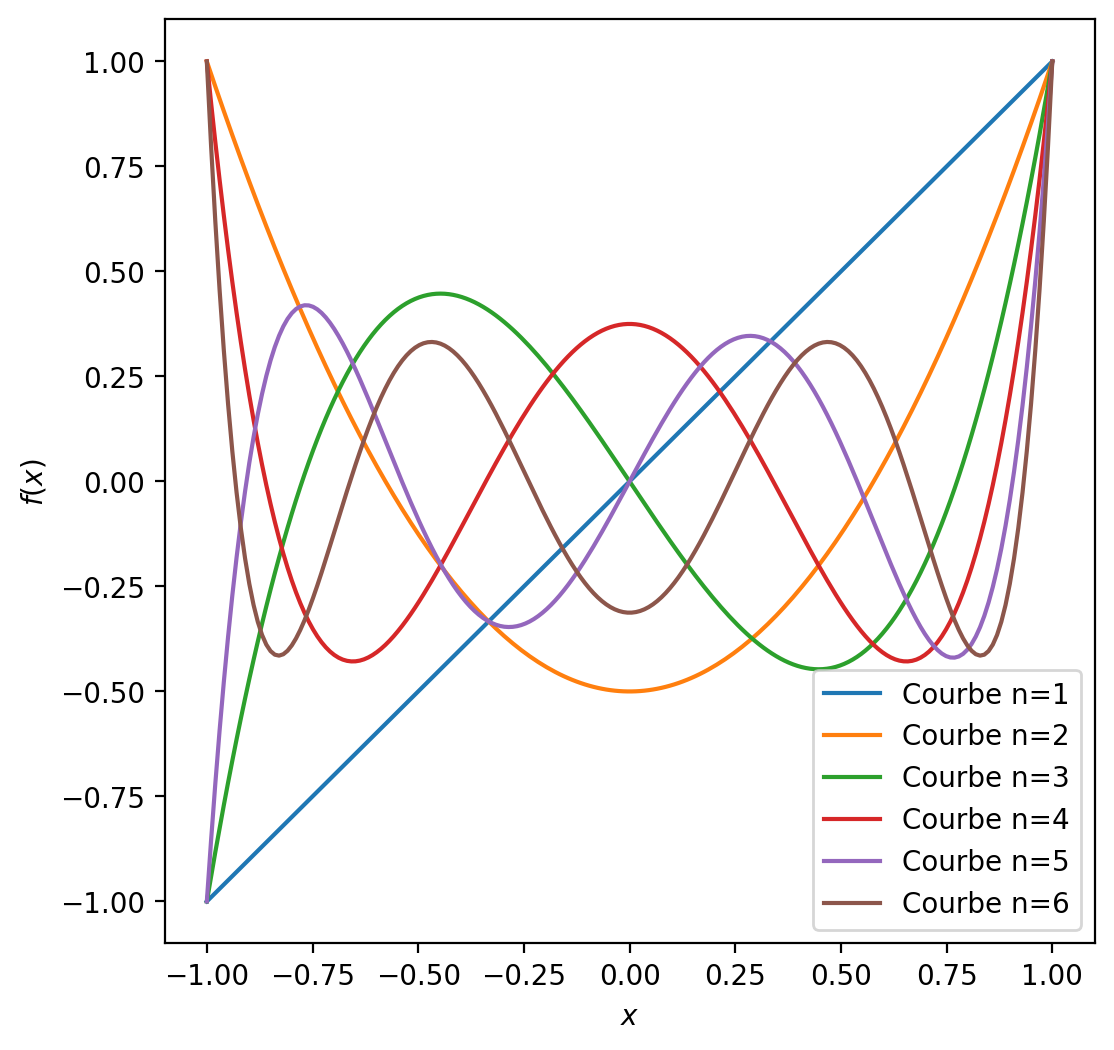

In [49]:
x = np.linspace(-1, 1, 200)
fig, ax = plt.subplots(figsize=(6,6))

for n in [x for x in range(1, 7)]:
    ax.plot(x, poly_legendre(x, n), label=f'Courbe n={n}')

ax.legend()
ax.set_xlabel(f'$x$')t
ax.set_ylabel(f'$f(x)$')

**Question 3.**
> 1. Ecrire une fonction `poids_gauss( x, n )` qui prend en argument un `ndarray` `x` et un entier `n` et qui retourne un `ndarray` des coéficients $ \lambda_1, \ldots, \lambda_n $ de la formule de Gauss à `n` points avec les points de quadrature `x`.
> 2. Testez votre fonction pour $ n = 1 $, $ x = [ 0 ] $ et $ n = 2 $, $ x = [ -1/\sqrt{3}, 1/ \sqrt{3} ] $.

In [194]:
def poids_gauss(x, n):
    return 2 * (1 - x**2) / (n**2 * poly_legendre(x, n-1)**2)

In [195]:
print(poids_gauss(np.array([0]), 1))
print(poids_gauss(np.array([-1/np.sqrt(3), 1/np.sqrt(3)]), 2))

[2.]
[1. 1.]


La fonction `roots_legendre` de `scipy.special` permet de calculer les valeurs approchées des racines $ x_1, x_2, \ldots, x_n $ du $n$-ième polynome de Legendre ainsi que les poids $ \lambda_1, \ldots, \lambda_n $ de la formule de quadrature de Gauss associée. 

**Question 4.**
> 1. En utilisant la fonction `roots_legendre` de `scipy.special` calculer les racines des polynomes de Legendre $ P_n $ pour $ n = 1, \ldots, 6 $. Ajouter une représentation graphique des racines à l'image de la Question 2.2.
> 2. Comparer les coéficients de la formule de quadrature de Gauss à $ n $ points obtenus via la fonction `roots_legendre` et votre fonction `poids_gauss` pour quelques différentes valeurs de $ n $.  

Text(0, 0.5, '$f(x)$')

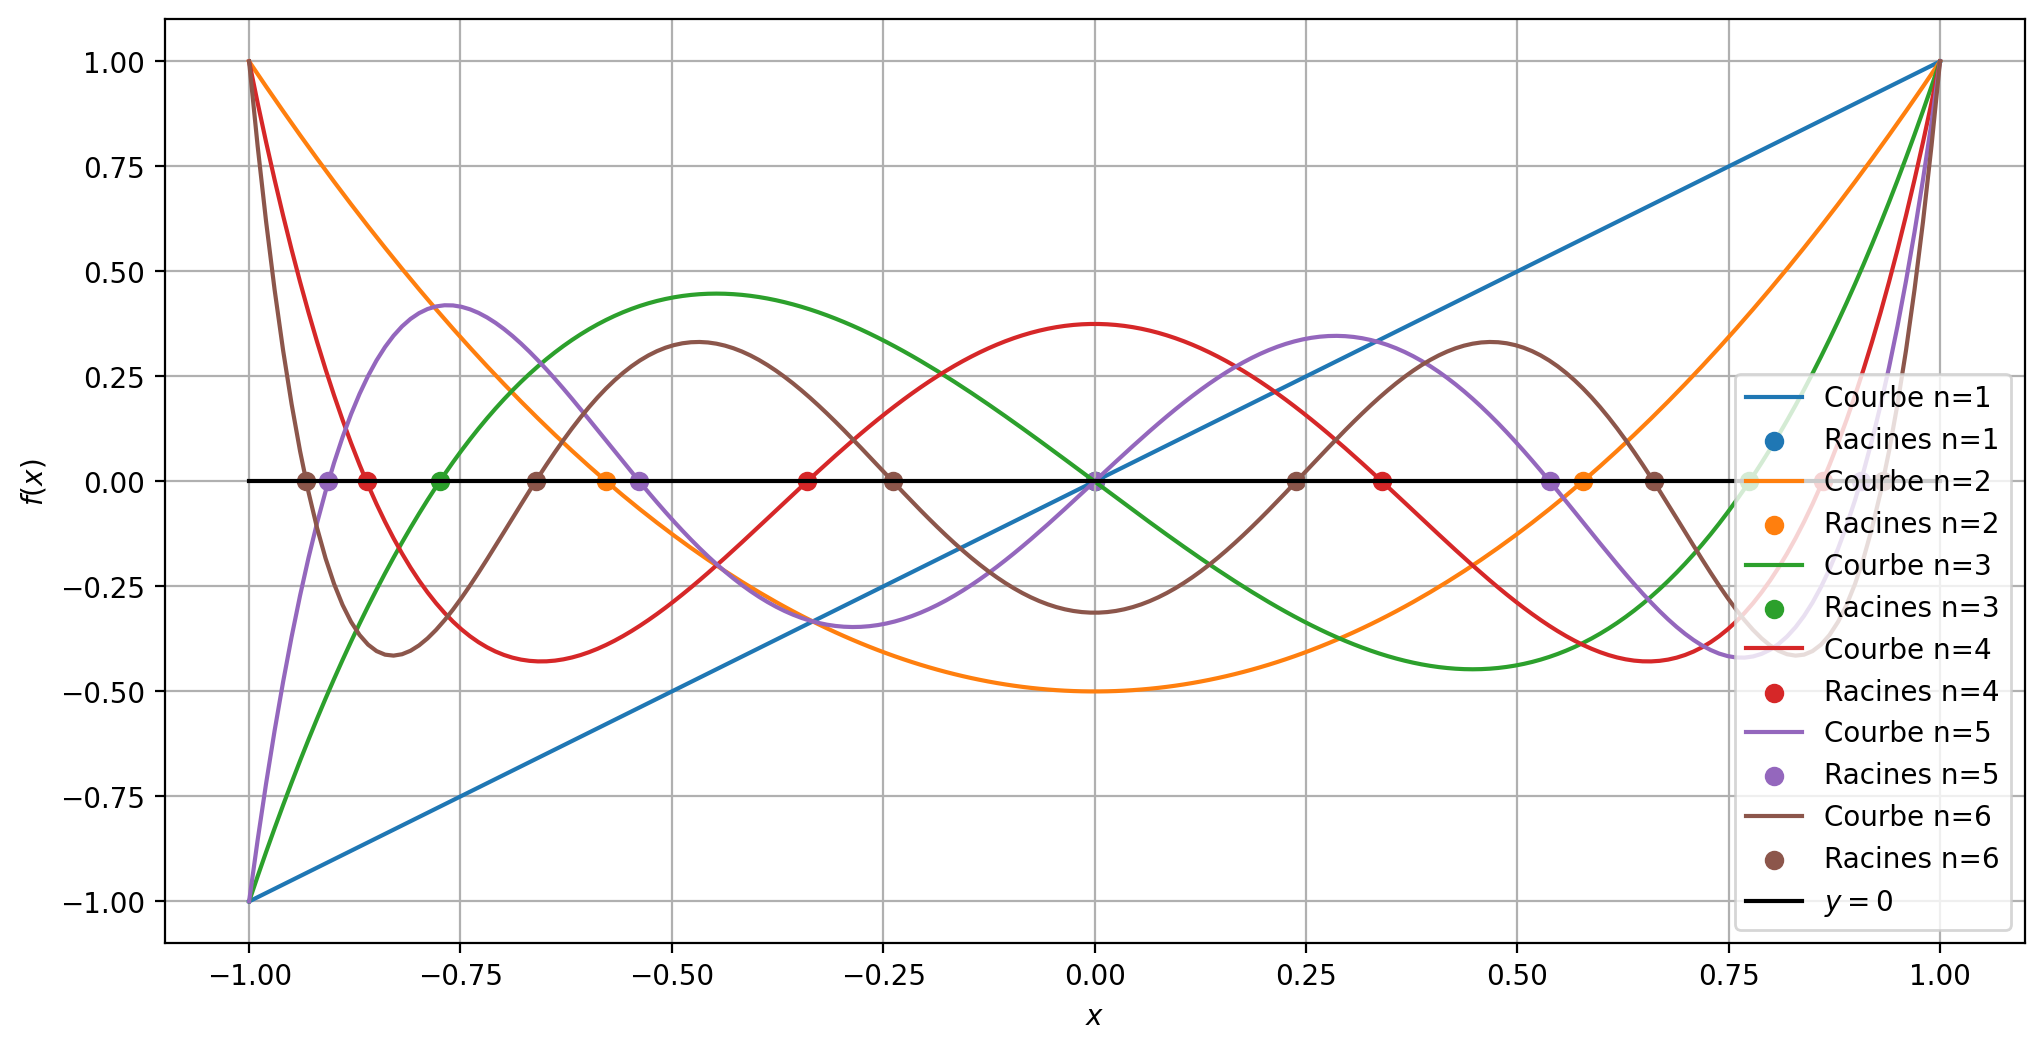

In [196]:
from scipy.special import roots_legendre

fig, ax = plt.subplots(figsize=(12,6))

for n in [x for x in range(1, 7)]:
    x = np.linspace(-1, 1, 200)
    roots, weight = roots_legendre(n)
    ax.plot(x, poly_legendre(x, n), label=f'Courbe n={n}')
    ax.scatter(roots, np.zeros_like(roots), label=f'Racines n={n}')
    
ax.plot(x, np.zeros_like(x), color='black', label=f'$y=0$')
ax.legend()
ax.grid()
ax.set_xlabel(f'$x$')
ax.set_ylabel(f'$f(x)$')

In [197]:
for n in [x for x in range(1, 7)]:
    roots, weight = roots_legendre(n)
    poids = poids_gauss(roots, n)
    print(f'Les poids de roots_legendre sont w={weight}')
    print(f'Les poids de poids_gauss sont w={poids}')
    print('\n')

Les poids de roots_legendre sont w=[2.]
Les poids de poids_gauss sont w=[2.]


Les poids de roots_legendre sont w=[1. 1.]
Les poids de poids_gauss sont w=[1. 1.]


Les poids de roots_legendre sont w=[0.55555556 0.88888889 0.55555556]
Les poids de poids_gauss sont w=[0.55555556 0.88888889 0.55555556]


Les poids de roots_legendre sont w=[0.34785485 0.65214515 0.65214515 0.34785485]
Les poids de poids_gauss sont w=[0.34785485 0.65214515 0.65214515 0.34785485]


Les poids de roots_legendre sont w=[0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
Les poids de poids_gauss sont w=[0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]


Les poids de roots_legendre sont w=[0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]
Les poids de poids_gauss sont w=[0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]




**Question 5.**
> 1. Programmez une fonction `quad_gauss( f, x, n )` qui prend en argument une fonction `f` et un entier `n` et qui retourne la valeur approchée de $I$ obtenue par la formule de quadrature de Gauss à $ n $ points.
> 2. Pour $ n = 6 $ vérifier numériquement que la formule de quadratue de Gauss à $ n $ points est précise de degré $ 2n -1 $.

In [198]:
def quad_gauss(f, n):
    roots, _ = roots_legendre(n)
    lk = poids_gauss(roots, n)

    return np.sum(lk * f(roots))

In [199]:
n = 6
print(f'Précision de I(f0): {np.abs(quad_gauss(f0, n) - quad(f0, -1, 1)[0])}')
print(f'Précision de I(f0): {np.abs(quad_gauss(f1, n) - quad(f1, -1, 1)[0])}')
print(f'Degré de précision est {2*n-1}')

Précision de I(f0): 1.5694112676101213e-12
Précision de I(f0): 1.2742946919885867e-08
Degré de précision est 11


**Question 6.**
> 1. Comparez la valeur approchée de $I$ obtenue à l'aide de la fonction `quad_gauss` avec sa valeur exacte pour des différents nombres de points $n = 1, 2, \ldots, 13$. Que se passe-t-il quand $n$ augmente ?
> 2. Tracez le logarithme d'erreur entre l'intégrale approchée et la valeur exacte en fonction de $n$. Que observez-vous?

In [203]:
for n in [x for x in range(1, 14)]:
    print(f'--- [ n = {n} ] ---')
    for f in [f0, f1]:
        print(f'I({f.__name__}) par quad_gauss: {quad_gauss(f, n)}')
        print(f'I({f.__name__}) par quad: {quad(f, -1, 1)[0]}')
    print('')

--- [ n = 1 ] ---
I(f0) par quad_gauss: 2.0
I(f0) par quad: 2.3504023872876028
I(f1) par quad_gauss: 2.0
I(f1) par quad: 1.7112487837842973

--- [ n = 2 ] ---
I(f0) par quad_gauss: 2.342696087909731
I(f0) par quad: 2.3504023872876028
I(f1) par quad_gauss: 1.6929634497812287
I(f1) par quad: 1.7112487837842973

--- [ n = 3 ] ---
I(f0) par quad_gauss: 2.3503369286800107
I(f0) par quad: 2.3504023872876028
I(f1) par quad_gauss: 1.712020245201908
I(f1) par quad: 1.7112487837842973

--- [ n = 4 ] ---
I(f0) par quad_gauss: 2.3504020921563775
I(f0) par quad: 2.3504023872876028
I(f1) par quad_gauss: 1.7112245045994903
I(f1) par quad: 1.7112487837842973

--- [ n = 5 ] ---
I(f0) par quad_gauss: 2.350402386462827
I(f0) par quad: 2.3504023872876028
I(f1) par quad_gauss: 1.7112493935244661
I(f1) par quad: 1.7112487837842973

--- [ n = 6 ] ---
I(f0) par quad_gauss: 2.3504023872860333
I(f0) par quad: 2.3504023872876028
I(f1) par quad_gauss: 1.7112487710413504
I(f1) par quad: 1.7112487837842973

--- [ n

**Question 7.**
> Pour les méthodes composées du rectangles, du trapèze et de Simpson tracez sur le meme graphique le logarithme d'erreur entre l'intégrale approchée et la valeur exacte en fonction de $n$, où $ n $ est le nombre de points utilisés pour intégrer la fonction $ f $. Commentez. 